Alpha Vantage delivers a free API for real time financila data and most used financial indicators in a simple JSON or Pandas format.
It requires a free API key from Alpha Vantgae site. To install the package:

pip install alpha_vantage


### Caution: Alphavantage offers 5 free API calls per minute

- https://www.alphavantage.co/documentation/
- https://pypi.org/project/alpha-vantage/
- https://docs.cryptohopper.com/docs/charts/what-are-technical-indicators/

In [1]:
#pip install alpha_vantage

To get data from the API, simply import the library and call the object with your API key. Next, get ready for some awesome, free, realtime finance data. Your API key may also be stored in the environment variable. I have stored it in the same folder.

In [37]:
from alpha_vantage.cryptocurrencies import CryptoCurrencies
import pandas as pd
pd.set_option('display.max_columns', 30)

In [3]:
api_key= "D:\\algorithmic_trading\\alphaVantage_api_key.txt"

- The library supports giving its results as json dictionaries (default), pandas dataframe (if installed) or csv, simply pass the parameter output_format='pandas' to change the format of the output for all the API calls in the given class.
- The pandas data frame given by the call, can have either a date string indexing or an integer indexing (by default the indexing is 'date'), depending on your needs, you can use both.

In [4]:
#Get data for a single ticker:
cc= CryptoCurrencies(key=open(api_key, 'r').read(), output_format= 'pandas')


### Dataframe Structure

We are getting historical intraday OHLCV time series (it is premium endpoint). 
- Time interval between two consecutive data points in the time series. The following values are supported: `1min, 5min, 15min, 30min, 60min`
- outputsize (Optional)    - 
By default, outputsize=compact. Strings compact and full are accepted with the following specifications: compact returns only the latest 100 data points in the intraday time series; full returns the full-length intraday time series. The "compact" option is recommended if you would like to reduce the data size of each API cal
 

#### Going ahead with DIGITAL_CURRENCY_DAILY call:

This API returns the daily historical time series for a digital currency (e.g., BTC) traded on a specific market (e.g., EUR/Euro), refreshed daily at midnight (UTC). Prices and volumes are quoted in both the market-specific currency and USD.l.

In [5]:
btc_data, btc_meta_data= cc.get_digital_currency_daily(symbol= 'BTC', market= 'USD')
btc_data

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2025-09-01,108247.95,108350.04,107629.86,107853.53,194.359837
2025-08-31,108827.92,109489.79,108060.79,108247.95,2702.509576
2025-08-30,108378.32,108928.79,107369.69,108827.93,2828.674616
2025-08-29,112574.84,112642.53,107469.13,108378.32,7806.093833
2025-08-28,111253.22,113480.00,110858.78,112574.85,4637.291822
...,...,...,...,...,...
2024-09-21,63210.94,63575.63,62755.00,63362.74,1960.857120
2024-09-20,62956.04,64140.67,62340.00,63210.69,10636.108281
2024-09-19,61770.38,63891.82,61569.16,62960.14,15075.868355


In [6]:
btc_meta_data

{'1. Information': 'Daily Prices and Volumes for Digital Currency',
 '2. Digital Currency Code': 'BTC',
 '3. Digital Currency Name': 'Bitcoin',
 '4. Market Code': 'USD',
 '5. Market Name': 'United States Dollar',
 '6. Last Refreshed': '2025-09-01 00:00:00',
 '7. Time Zone': 'UTC'}

In [7]:
btc_data.columns= ["open", "high", "low", "close", "volume"]
#Earliest datapoint first, sorted in ascending order of dates
btc_data= btc_data.iloc[::-1]
btc_data.head(50)

,open,high,low,close,volume
date,,,,,
2024-09-17,58209.76,61373.41,57620.27,60312.60,11701.890747
2024-09-18,60317.38,61800.00,59174.50,61769.18,11471.506830
2024-09-19,61770.38,63891.82,61569.16,62960.14,15075.868355
2024-09-20,62956.04,64140.67,62340.00,63210.69,10636.108281
2024-09-21,63210.94,63575.63,62755.00,63362.74,1960.857120
2024-09-22,63362.74,64000.00,62380.55,63577.66,2882.234198
2024-09-23,63580.39,64739.67,62566.28,63338.87,7014.744599
2024-09-24,63338.85,64700.00,62689.15,64272.93,8933.464736
2024-09-25,64272.93,64811.00,62932.80,63130.89,5909.095105


In [8]:
btc_data.shape

(350, 5)

For Cryptocurrencies Alphavantage goes upto 350 historical datapoints.

In [9]:
btc_data.isna().count()

open      350
high      350
low       350
close     350
volume    350
dtype: int64

### Technical Indicators

For testing out different technical indicators here I am using Yahoo Finance, we will using a pair of Technical Indicators in this section and see the daily returns. You can only get intraday data.

https://ranaroussi.github.io/yfinance/reference/api/yfinance.download.html

In [10]:
import yfinance as yf

### Momentum Indicator

##### MACD (Moving Average Convergence and Divergence)

Momentum based indicator which is calculated by taking the difference of two MAs of an asset(typically 12 period MA and 26 period MA).

MACD can be used with MA crossover by considering the 9 period MA line as the short-term signal line and the 26 period MA as the long term. Traders receive a `Buy` signal whenever the MACD line croses the short-term MA line from below and `Sell` signal if the MACD line cuts the short-term MA from above. This is called `Crossover Strategy`.

*Drawback*: Produce numerous False Positives, it occurs when the price of an asset moves sideways. It should be used along with a trend-following Indicators.

*Calculation:* 

MACD = EMA(12)-EMA(26)  -> slow signal line

SMACD= EMA9(MACD)  -> 9 Period EMA of the MACD Line (fast signal line) 

where, EMA is Exponenential Moving Average

1. Calculate a 12-period EMA of the price for the chosen time period2. Calculate a 26-period EMA of the price for the chosen time period
3. Subtract the 26-period EMA from the 12-period EMA to create the MACD line
4. 
Calculate a nine-period EMA of the MACD line (the result obtained from step 3) to create the sign l l.
5. .
Subtract the signal line from the MACD line to create the histogam.

In [11]:
#Getting historical data for cryptocurrencies:
def get_historical_data(ticker, period, interval, start=None, end= None):
    data= yf.Ticker(ticker).history(period, interval, start, end)
    data.drop(["Dividends", "Stock Splits"], axis= 'columns', inplace= True)
    return data
    

In [12]:
btc_usd= get_historical_data("BTC-USD", "5D", "1m")
btc_usd.tail(50)

,Open,High,Low,Close,Volume
Datetime,,,,,
2025-09-01 09:18:00+00:00,109777.507812,109777.507812,109777.507812,109777.507812,0
2025-09-01 09:19:00+00:00,109758.625000,109758.625000,109758.625000,109758.625000,59412480
2025-09-01 09:20:00+00:00,109732.429688,109732.429688,109732.429688,109732.429688,8155136
2025-09-01 09:22:00+00:00,109711.250000,109711.250000,109711.250000,109711.250000,0
2025-09-01 09:23:00+00:00,109714.851562,109714.851562,109714.851562,109714.851562,0
2025-09-01 09:24:00+00:00,109716.148438,109716.148438,109716.148438,109716.148438,7839744
2025-09-01 09:25:00+00:00,109704.937500,109704.937500,109704.937500,109704.937500,0
2025-09-01 09:27:00+00:00,109718.320312,109718.320312,109718.320312,109718.320312,1451048960
2025-09-01 09:28:00+00:00,109700.898438,109700.898438,109700.898438,109700.898438,71704576


In [13]:
btc_usd.shape

(5221, 5)

In [14]:
btc_usd.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

##### Resampling the candles to 15min data

In [15]:
btcusd_resample= btc_usd.resample("15min").agg({
    "Open": "first",
    "High": "max",
    "Low": "min",
    "Close": "last"
})

btcusd_resample

,Open,High,Low,Close
Datetime,,,,
2025-08-28 00:00:00+00:00,111261.367188,111471.171875,111227.992188,111470.437500
2025-08-28 00:15:00+00:00,111465.656250,111506.000000,110988.132812,111084.882812
2025-08-28 00:30:00+00:00,111131.679688,111225.359375,110909.070312,111225.359375
2025-08-28 00:45:00+00:00,111297.914062,111441.859375,111184.648438,111308.015625
2025-08-28 01:00:00+00:00,111342.492188,111515.531250,111342.492188,111515.531250
...,...,...,...,...
2025-09-01 09:15:00+00:00,109775.421875,109777.507812,109686.382812,109686.382812
2025-09-01 09:30:00+00:00,109702.078125,109830.226562,109652.390625,109769.609375
2025-09-01 09:45:00+00:00,109783.132812,109790.890625,109543.789062,109543.789062


In [16]:
btcusd_data= btcusd_resample.copy()  # Creating a copy of the data before going forward with the strategies

In [17]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.offline as pyo

#### Calculation

EMA is calculated for a period N:
Smoothing factor x= 2/(N+1)
EMA= (Close - EMA{previous_period}) * x + EMA{previous_period}

To do so in python pandas `span` works like EMA:
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.ewm.html

In [18]:
# using pandas ewm -> provide exponentially weighted EW calculation
# we will use ´span´ similar to the smoothing factor calculation
def ema(series:pd.Series, period:int):
    return series.ewm(span= period, adjust= False, min_periods= period).mean()
    
#default values of the fast line, slow line and signal line are 12, 26 and 9 respectively.
def macd(df: pd.DataFrame, fast:int=12, slow:int=26, signal:int=9):
    df['MA_fast']= ema(df.Close, fast)
    df['MA_slow']= ema(df.Close, slow)
    df['MACD']= df['MA_fast']-df['MA_slow']
    df['MACD_signal']= ema(df.MACD, signal)
    df['MACD_hist']= df['MACD']- df['MACD_signal']
    #plotting the indicator
    # df should have: index (Datetime), columns: Open, High, Low, Close, MACD, MACD_signal, MACD_hist
    df= btcusd_data
    start = btcusd_data['MACD'].first_valid_index() # Return index for first non-NA value or None, if no non-NA value is found.
    macd_part = btcusd_data.loc[start:,['MACD','MACD_signal','MACD_hist']]     
    
    
    fig = make_subplots(
        rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.03,
        row_heights=[0.6, 0.4], subplot_titles=("Price", f"MACD (fast,slow,signal)")
    )
    
    # --- Price (candlestick)
    fig.add_trace(
        go.Candlestick(
            x=df.index, open=df['Open'], high=df['High'],
            low=df['Low'], close=df['Close'], name="Price"
        ),
        row=1, col=1
    )
    
    # --- MACD lines
    fig.add_trace(
        go.Scatter(x=macd_part.index, y=macd_part['MACD'], mode='lines', name='MACD'),
        row=2, col=1
    )
    fig.add_trace(
        go.Scatter(x=macd_part.index, y=macd_part['MACD_signal'], mode='lines', name='Signal'),
        row=2, col=1
    )
    
    # --- Histogram (green above 0, red below)
    hist_colors = np.where(macd_part['MACD_hist'] >= 0, 'rgba(0,160,0,0.6)', 'rgba(200,0,0,0.6)')
    fig.add_trace(
        go.Bar(x=macd_part.index, y=macd_part['MACD_hist'], name='Histogram', marker_color=hist_colors),
        row=2, col=1
    )
    
    # Zero line for MACD panel
    fig.add_hline(y=0, line_width=1, line_dash='dash', row=2, col=1)
    
    fig.update_layout(
        title=f"BTCUSD 15m with MACD (fast, slow, signal)",
        xaxis_rangeslider_visible=False,
        hovermode="x unified",
        legend_orientation="h",
        height=750,
        margin=dict(t=50, l=50, r=20, b=40),
        yaxis_title="Price",
        yaxis2_title="MACD"
    )
    
    #Show the chart
    pyo.plot(fig, filename= "MACD_Indicator.html")
    return df.loc[:,['Open', 'High', 'Low', 'Close', 'MACD', 'MACD_signal', 'MACD_hist']] # returns the selected list of columns
    
    

In [19]:
macd(btcusd_data, 12, 26, 9).head(50)

,Open,High,Low,Close,MACD,MACD_signal,MACD_hist
Datetime,,,,,,,
2025-08-28 00:00:00+00:00,111261.367188,111471.171875,111227.992188,111470.437500,NaN,NaN,NaN
2025-08-28 00:15:00+00:00,111465.656250,111506.000000,110988.132812,111084.882812,NaN,NaN,NaN
2025-08-28 00:30:00+00:00,111131.679688,111225.359375,110909.070312,111225.359375,NaN,NaN,NaN
2025-08-28 00:45:00+00:00,111297.914062,111441.859375,111184.648438,111308.015625,NaN,NaN,NaN
2025-08-28 01:00:00+00:00,111342.492188,111515.531250,111342.492188,111515.531250,NaN,NaN,NaN
2025-08-28 01:15:00+00:00,111511.093750,111588.000000,111421.125000,111421.125000,NaN,NaN,NaN
2025-08-28 01:30:00+00:00,111450.210938,111607.281250,111450.210938,111602.320312,NaN,NaN,NaN
2025-08-28 01:45:00+00:00,111559.554688,111673.765625,111557.625000,111656.320312,NaN,NaN,NaN
2025-08-28 02:00:00+00:00,111658.140625,111776.132812,111610.156250,111610.156250,NaN,NaN,NaN


##### Handling the NaNs obtained after calculation:
The first NaNs are the warm-up period. If you backfill them you’ll invent flat values and can create fake early signals—bad for analysis or backtests. The NaNs can be backfilled only while downloading the data if any of the OHLCV due to some reason has missing values.

#### Volatility based Indicators:

Bollinger Bands and ATR (Average True Range) both of these indicators are from `**volatility based indicators**` beacuse both of them try to gauge the volatility of the stocks in order to determine if they are `over-valued` or `under-valued`.

In case of Bollinger Bands, the bands widen when the stocks's price becomes more volatile and contract when the stock's price beomes stable.
These bands are composed of three lines:

- SMA (the middle band)
- Upper and Lower Bands: two standard deviations above and below the SMA line
- By default SMA line is of 20 periods

**Bollinger Bands** helps to identify the entry and the exit positions and can also be use for `Trend Analysis`.

- Direction of the middle band line moving *upward*, suggests an Uptrend
- Direction of the middle band line moving *downward*, suggests a Downtrend

**Overbought and Underbought**
- As the price (Close) touches the upper band, it could be Overbought, short signal.
- As the price (Close) touches the lower band, it could be Oversold, long signal.

**Drawback**:
The bands are based on Standard Deviation, which assumes the Price returns to a Normal Distribution but financial markets are known to have Fat-Tail Distribution, leading to skewness, which can lead to unexpected moves beyound the bands, thus employing other indicators like RSI or MACD can help identify the behaviour of the market and help filter out the False Signals. 

**ATR (Average True Range)** decomposing the range of an asset for that period. It is typically derived froma 14 period SMA. It can be a very good indicator to spot when the big investors are entering the market to buy or sell. It is commonly used as an `exit method`. 

The true range indicates is taken of the following:

(High-Low): Current High and Low
|High-Close{Previous}|: absolute values of current High and previous Close
|Low-Close{Previous}|: absolute value of current Low and previous Close

ATR is the summation of the true range for a certain period N, where `True Range(TR)= max[(High-Low), |High-Close{Previous}|, |Low-Close{Previous}|]`

In summary, ATR is a volatility gauge: higher ATR means bigger average candle ranges, lower ATR means quieter market.

In [62]:
def atr_indicator(df: pd.DataFrame, period:int=14):
    df_atr= df.copy()
    df_atr['H-L']= df_atr["High"]- df_atr["Low"]
    df_atr['H-PC']= abs(df_atr["High"]- df_atr["Close"].shift(1))
    df_atr['L-PC']= abs(df_atr["Low"]-df_atr["Close"].shift(1))
    # calculate maximum values along the row:
    df_atr['TR']= df_atr[['H-L', 'H-PC', 'L-PC']].max(axis=1, skipna= False)
    df_atr['ATR']= ema(df_atr['TR'], period)
    
    start = df_atr['ATR'].first_valid_index() # Return index for first non-NA value or None, if no non-NA value is found.
    '''
    fig = make_subplots(
        rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.03,
        row_heights=[0.6, 0.4], subplot_titles=("Price", f"ATR(Period={period})")
    )
    
    # --- Price (candlestick)
    fig.add_trace(
        go.Candlestick(
            x=df_atr.index, open=df_atr['Open'], high=df_atr['High'],
            low=df_atr['Low'], close=df_atr['Close'], name="Price Candlestick"
        ),
        row=1, col=1
    )
    
    # --- ATR lines
    fig.add_trace(
        go.Scatter(x=df_atr.index, y=df_atr['ATR'], mode='lines', name='ATR'),
        row=2, col=1
    )
      
    # Zero line for MACD panel
    fig.add_hline(y=0, line_width=1, line_dash='dash', row=2, col=1)
    
    fig.update_layout(
        title=f"BTCUSD 15m with ATR (Period:{period})",
        xaxis_rangeslider_visible=False,
        hovermode="x unified",
        legend_orientation="h",
        height=750,
        margin=dict(t=50, l=50, r=20, b=40),
        yaxis_title="Price",
        yaxis2_title="ATR"
    )
    
    #Show the chart
    pyo.plot(fig, filename= "ATR_Indicator.html")
    '''
    return df_atr

In [63]:
atr_indicator(btcusd_resample, period=14).head(50)

,Open,High,Low,Close,H-L,H-PC,L-PC,TR,ATR
Datetime,,,,,,,,,
2025-08-28 00:00:00+00:00,111261.367188,111471.171875,111227.992188,111470.437500,243.179688,NaN,NaN,NaN,NaN
2025-08-28 00:15:00+00:00,111465.656250,111506.000000,110988.132812,111084.882812,517.867188,35.562500,482.304688,517.867188,NaN
2025-08-28 00:30:00+00:00,111131.679688,111225.359375,110909.070312,111225.359375,316.289062,140.476562,175.812500,316.289062,NaN
2025-08-28 00:45:00+00:00,111297.914062,111441.859375,111184.648438,111308.015625,257.210938,216.500000,40.710938,257.210938,NaN
2025-08-28 01:00:00+00:00,111342.492188,111515.531250,111342.492188,111515.531250,173.039062,207.515625,34.476562,207.515625,NaN
2025-08-28 01:15:00+00:00,111511.093750,111588.000000,111421.125000,111421.125000,166.875000,72.468750,94.406250,166.875000,NaN
2025-08-28 01:30:00+00:00,111450.210938,111607.281250,111450.210938,111602.320312,157.070312,186.156250,29.085938,186.156250,NaN
2025-08-28 01:45:00+00:00,111559.554688,111673.765625,111557.625000,111656.320312,116.140625,71.445312,44.695312,116.140625,NaN
2025-08-28 02:00:00+00:00,111658.140625,111776.132812,111610.156250,111610.156250,165.976562,119.812500,46.164062,165.976562,NaN


### Bollinger Bands

In [22]:
from statistics import stdev

In [23]:
#function for bollinger bands techincal indicator
# k is the factor to be multipled with the standard devaition, commonly the value is 2
# k=2, captures ~95% of data if it were noramlly distributed
# k= 1.5, narrower bands(more sensitive, more signals)
# k=3, wider bands(fewer signals, but stronger ones)

def bollinger_bands(df: pd.DataFrame, k:float, period:int= 14):
    df_bollinger= df.copy()
    df_bollinger['middle_band']= df_bollinger['Close'].rolling(period).mean()
    # there are two common versions of standard deviation: Population(divide by N), Sample(divide by N-1)
    # the denominator becomes N-ddof, where ddof= 0 for population std and 1(default) in sample std
    df_bollinger['upper_band']= df_bollinger['middle_band'] + k * df_bollinger['Close'].rolling(period).std(ddof= 0)
    df_bollinger['lower_band']= df_bollinger['middle_band'] - k * df_bollinger['Close'].rolling(period).std(ddof= 0)
    df_bollinger['BB_width']= df_bollinger['upper_band'] - df_bollinger['lower_band']
    return df_bollinger
    
    
    

In [24]:
bollinger_bands(btcusd_resample, k= 3, period= 20).head(50)

,Open,High,Low,Close,middle_band,upper_band,lower_band,BB_width
Datetime,,,,,,,,
2025-08-28 00:00:00+00:00,111261.367188,111471.171875,111227.992188,111470.437500,NaN,NaN,NaN,NaN
2025-08-28 00:15:00+00:00,111465.656250,111506.000000,110988.132812,111084.882812,NaN,NaN,NaN,NaN
2025-08-28 00:30:00+00:00,111131.679688,111225.359375,110909.070312,111225.359375,NaN,NaN,NaN,NaN
2025-08-28 00:45:00+00:00,111297.914062,111441.859375,111184.648438,111308.015625,NaN,NaN,NaN,NaN
2025-08-28 01:00:00+00:00,111342.492188,111515.531250,111342.492188,111515.531250,NaN,NaN,NaN,NaN
2025-08-28 01:15:00+00:00,111511.093750,111588.000000,111421.125000,111421.125000,NaN,NaN,NaN,NaN
2025-08-28 01:30:00+00:00,111450.210938,111607.281250,111450.210938,111602.320312,NaN,NaN,NaN,NaN
2025-08-28 01:45:00+00:00,111559.554688,111673.765625,111557.625000,111656.320312,NaN,NaN,NaN,NaN
2025-08-28 02:00:00+00:00,111658.140625,111776.132812,111610.156250,111610.156250,NaN,NaN,NaN,NaN


### RSI:
Relative Strength Index is a momentum indicator used in technical analysis. RSI measures the speed and magnitude of a security's recent price changes to detect overbought or undersold conditions in the price of that security.

RSI is displayed as an oscillator(a line graph) on a scale of 0 to 100. 

Traditionally, an RSI reading of 70 or above indicates an overbought condition. A reading of 30 or below indicates an oversold condition.


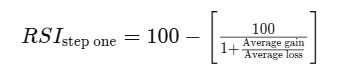




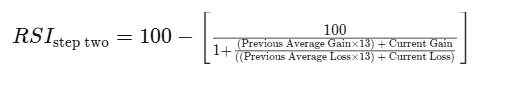


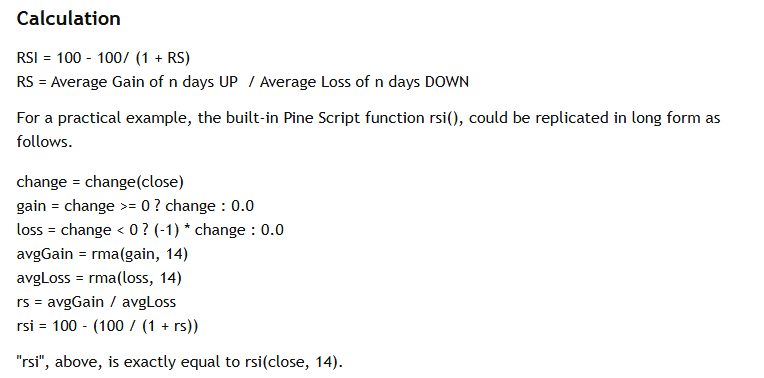 ]


In [38]:
def RSI(df:pd.DataFrame, period:int= 14):
    df_rsi= df.copy()
    df_rsi['Close_Change']= df_rsi['Close']- df_rsi['Close'].shift(1)
    df_rsi['Gain']= np.where(df_rsi['Close_Change'] >= 0, df_rsi['Close_Change'], 0)
    df_rsi['Loss']= np.where(df_rsi['Close_Change']<0, -1 * df_rsi['Close_Change'], 0)
    df_rsi['Avg_Gain']= df_rsi['Gain'].ewm(alpha=1/period, min_periods= period).mean()
    df_rsi['Avg_Loss']= df_rsi['Loss'].ewm(alpha=1/period, min_periods= period).mean()
    df_rsi['RS']= df_rsi['Avg_Gain']/df_rsi['Avg_Loss']
    df_rsi['RSI']= 100-(100/(1+df_rsi['RS']))
    return df_rsi

    

In [40]:
RSI(btcusd_resample, 14).head(20)

,Open,High,Low,Close,Close_Change,Gain,Loss,Avg_Gain,Avg_Loss,RS,RSI
Datetime,,,,,,,,,,,
2025-08-28 00:00:00+00:00,111261.367188,111471.171875,111227.992188,111470.437500,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
2025-08-28 00:15:00+00:00,111465.656250,111506.000000,110988.132812,111084.882812,-385.554688,0.000000,385.554688,NaN,NaN,NaN,NaN
2025-08-28 00:30:00+00:00,111131.679688,111225.359375,110909.070312,111225.359375,140.476562,140.476562,0.000000,NaN,NaN,NaN,NaN
2025-08-28 00:45:00+00:00,111297.914062,111441.859375,111184.648438,111308.015625,82.656250,82.656250,0.000000,NaN,NaN,NaN,NaN
2025-08-28 01:00:00+00:00,111342.492188,111515.531250,111342.492188,111515.531250,207.515625,207.515625,0.000000,NaN,NaN,NaN,NaN
2025-08-28 01:15:00+00:00,111511.093750,111588.000000,111421.125000,111421.125000,-94.406250,0.000000,94.406250,NaN,NaN,NaN,NaN
2025-08-28 01:30:00+00:00,111450.210938,111607.281250,111450.210938,111602.320312,181.195312,181.195312,0.000000,NaN,NaN,NaN,NaN
2025-08-28 01:45:00+00:00,111559.554688,111673.765625,111557.625000,111656.320312,54.000000,54.000000,0.000000,NaN,NaN,NaN,NaN
2025-08-28 02:00:00+00:00,111658.140625,111776.132812,111610.156250,111610.156250,-46.164062,0.000000,46.164062,NaN,NaN,NaN,NaN


#### Average Directional Index:
ADX determines the strength of a trend.

The up or down trend is shown by Positive Directional Indicator(+DI), Negative Directional Indicator(-DI). ADX quantifies trens strength by measuring the degree of directional movement in price. It is based on a moving average of price expansion or contraction over a given period. The default setting is 14 periods.

ADX is plotted in a single line with values ranging from 0 to 100. It is non-directional, meaning it registers trend strength, not whether price is trending up or down.

- 0-25: Absent or weak trend
- 25-50: Strong Trend
- 50-75: Very Strong Trend
- 75-100: Extremely Strong Trend

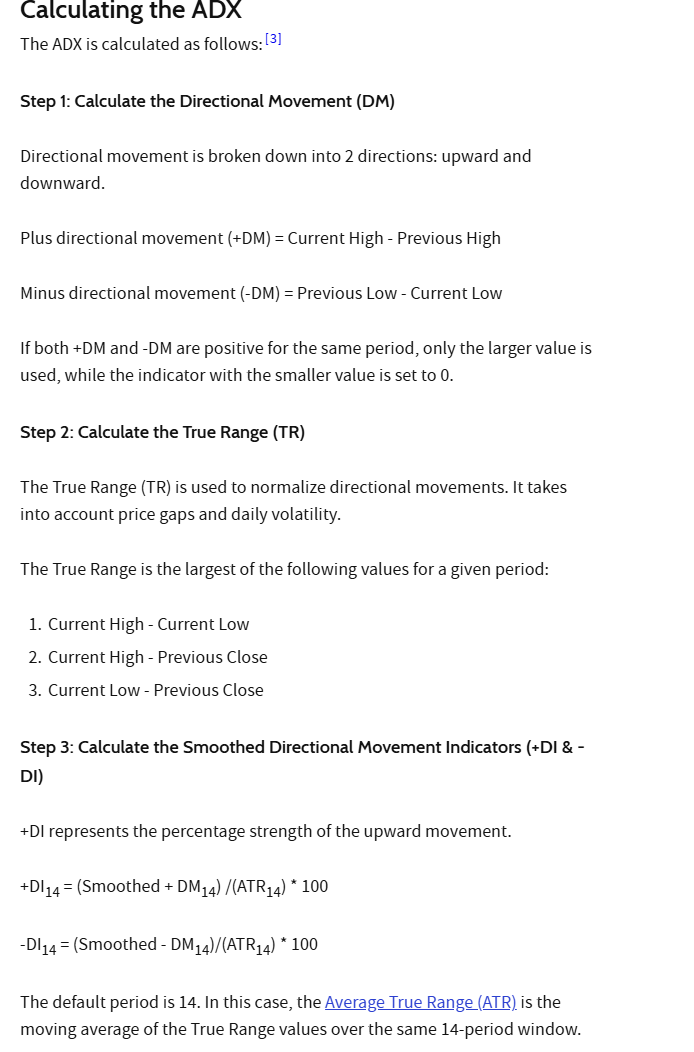
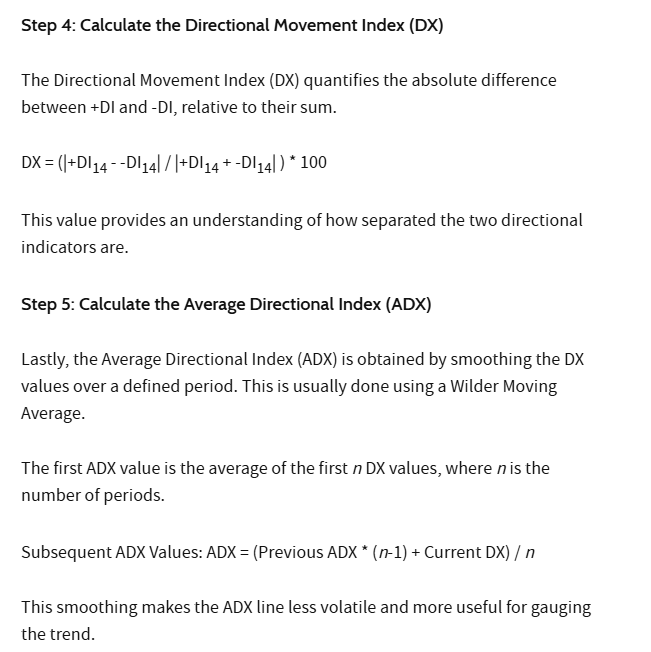
  

In [64]:
def ADX(df: pd.DataFrame, period:int= 20):
    df_adx= df.copy()
    upMove= df_adx['High']-df_adx['High'].shift(1)
    downMove= df_adx['Low'].shift(1)- df_adx['Low']
    alpha= 1/period
    #True Range
    tr= pd.concat([
        df_adx['High']-df_adx['Low'],
        (df_adx['High'] - df_adx['Close'].shift(1)).abs(),
        (df_adx['Low']-df_adx['Close'].shift(1)).abs()
    ], axis=1).max(axis=1)

    #+Dm and -DM calculation 
    df_adx['+DM']= np.where((upMove > downMove) & (upMove > 0), upMove, 0)
    df_adx['-DM']= np.where((upMove < downMove) & (downMove > 0), downMove, 0)

    smoothed_atr= tr.ewm(alpha= 1/period, adjust= False, min_periods= period).mean()
    #Wilder smoothed DM given adjust= False for recursive EMA
    smoothed_p_dm = df_adx['+DM'].ewm(alpha=alpha, adjust=False, min_periods=period).mean()
    smoothed_n_dm = df_adx['-DM'].ewm(alpha=alpha, adjust=False, min_periods=period).mean()
    
    
    #df_adx['+DI']= 100 * (df_adx['+DM']/df_adx['ATR']).ewm(span= period, min_periods= period).mean()
    #df_adx['-DI']= 100 * (df_adx['-DM']/df_adx['ATR']).ewm(span= period, min_periods= period).mean()

    df_adx['+DI'] = 100 * (smoothed_p_dm / smoothed_atr)
    df_adx['-DI'] = 100 * (smoothed_n_dm / smoothed_atr)

    #Avoid divide-by-zero when +DI + -DI== 0
    denom= (df_adx['+DI']+df_adx['-DI']).replace(0, np.nan)

    #Calculating ADX:
    df_adx['ADX']= 100*(abs((df_adx['+DI']-df_adx['-DI'])/denom).ewm(alpha=alpha, adjust= False,min_periods= period).mean())
    return df_adx
    
   
    

In [65]:
ADX(btcusd_resample).head(50)

,Open,High,Low,Close,+DM,-DM,+DI,-DI,ADX
Datetime,,,,,,,,,
2025-08-28 00:00:00+00:00,111261.367188,111471.171875,111227.992188,111470.437500,0.000000,0.000000,NaN,NaN,NaN
2025-08-28 00:15:00+00:00,111465.656250,111506.000000,110988.132812,111084.882812,0.000000,239.859375,NaN,NaN,NaN
2025-08-28 00:30:00+00:00,111131.679688,111225.359375,110909.070312,111225.359375,0.000000,79.062500,NaN,NaN,NaN
2025-08-28 00:45:00+00:00,111297.914062,111441.859375,111184.648438,111308.015625,216.500000,0.000000,NaN,NaN,NaN
2025-08-28 01:00:00+00:00,111342.492188,111515.531250,111342.492188,111515.531250,73.671875,0.000000,NaN,NaN,NaN
2025-08-28 01:15:00+00:00,111511.093750,111588.000000,111421.125000,111421.125000,72.468750,0.000000,NaN,NaN,NaN
2025-08-28 01:30:00+00:00,111450.210938,111607.281250,111450.210938,111602.320312,19.281250,0.000000,NaN,NaN,NaN
2025-08-28 01:45:00+00:00,111559.554688,111673.765625,111557.625000,111656.320312,66.484375,0.000000,NaN,NaN,NaN
2025-08-28 02:00:00+00:00,111658.140625,111776.132812,111610.156250,111610.156250,102.367188,0.000000,NaN,NaN,NaN
